In [1]:
from qiskit import QuantumCircuit, transpile
import qiskit

import numpy as np

from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

In [2]:
circ = QuantumCircuit(1,1)  #create QuantumCircuit object

circ.h(0)


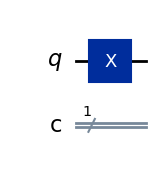

In [3]:
circ.draw("mpl") #draw circuit

In [4]:
circ.measure_all() #add a measurement to the circuit
# Construct an ideal simulator
simulator = AerSimulator()

{'1 0': 1024}


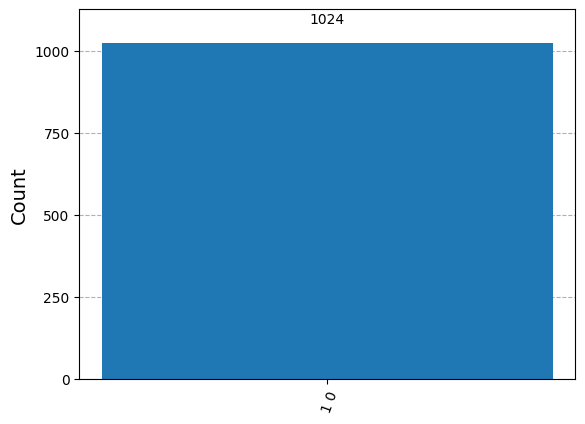

In [5]:
circ = transpile(circ, simulator)
result = simulator.run(circ).result() #get result object
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts)

In [6]:
from braket.circuits import Circuit, Gate, Observable
from braket.devices import LocalSimulator
from braket.aws import AwsDevice, AwsQuantumTask

# SV1

In [12]:
circuit = Circuit().h(0) 

device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/sv1")

shots = 1000
task = device.run(circuit, shots=shots)
result = task.result()
print(result.measurement_counts)


Counter({'1': 100})


# Rigetti 

In [14]:
rigetti = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Ankaa-3")
# run circuit
rigetti_task = rigetti.run(circuit, shots=1000)

# get id and status of submitted task
rigetti_task_id = rigetti_task.id
rigetti_status = rigetti_task.state()
# print('ID of task:', rigetti_task_id)
print("Status of quantum task:", rigetti_status)

Status of quantum task: QUEUED


# IQM

In [17]:
iqm = AwsDevice("arn:aws:braket:eu-north-1::device/qpu/iqm/Garnet")
# run circuit
iqm_task = iqm.run(circuit, shots=1000)

# get id and status of submitted quantum task
iqm_task_id = iqm_task.id
iqm_status = iqm_task.state()
# print('ID of quantum task:', iqm_task_id)
print("Status of quantum task:", iqm_status)

Status of quantum task: QUEUED


# IonQ

In [15]:
# run circuit
ionq = AwsDevice("arn:aws:braket:us-east-1::device/qpu/ionq/Aria-1")
ionq_task = ionq.run(circuit, shots=1000)

# get id and status of submitted quantum task
ionq_task_id = ionq_task.id
ionq_status = ionq_task.state()
# print('ID of quantum task:', ionq_task_id)
print("Status of quantum task:", ionq_status)

ClientError: An error occurred (400) when calling the CreateQuantumTask operation: Not enough qBraid credits